In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 1.61803398875*8, 8
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

In [10]:
import sys
import numpy
def kingery_bulmash_ip(d):
    """
    Returns one array
    function [incident pressure, distance] = kingery_bulmash_ip(d)
    kingery_bulmash_ii calculates the Kingery Bulmash incident pressure at
    a distance d from from a 1 lb TNT hemispherical surface burst.
    incident pressure and distance consists of the pressure in psi and
    the distance in feet.
    S. Kevin McNeill, 1.0 (Explicitly not copyrighted).
    This function is released to the public domain; Any use is allowed.
    """    
    # Hemispherical Charge
    
    # Incident Pressure Imperial Function 1 (0.170 - 100ft)
    u_i_ip_h = [-0.756579301809, 1.35034249993]

    # Incident Pressure Imperial Function 1 (0.170 - 2.41ft)
    y_i_ip_h = [1.9422502013, -1.6958988741,
                 -0.154159376846, 0.514060730593,
                  0.0988534365274, -0.293912623038,
                 -0.02668112345019, 0.109097496421,
                  0.00162846756311, -0.0214631030242,
                  0.0001456723382, 0.00167847752266]
    zlog = numpy.log10(d)
    
    # Incident Impulse - Imperial Function 1 (0.170 - 2.41ft)
    u_ip_i_h = u_i_ip_h[0] + u_i_ip_h[1] * zlog
    iiph = 10**(y_i_ip_h[0] + y_i_ip_h[1] * u_ip_i_h +
               y_i_ip_h[2] * u_ip_i_h**2 + y_i_ip_h[3] * u_ip_i_h**3 +
               y_i_ip_h[4] * u_ip_i_h**4 + y_i_ip_h[5] * u_ip_i_h**5 +
               y_i_ip_h[6] * u_ip_i_h**6 + y_i_ip_h[7] * u_ip_i_h**7 +
               y_i_ip_h[8] * u_ip_i_h**8 + y_i_ip_h[9] * u_ip_i_h**9 +
               y_i_ip_h[10] * u_ip_i_h**10 + y_i_ip_h[11] * u_ip_i_h**11)
    return iiph

# TNT Equivalency for Incident Pressure

### For equal pressures:

$$E_P = \frac{W_{TNT}}{W_{test}}$$

$$Z = \frac{R}{W^{1/3}}$$

Solving for W and substituting into $E_P$ we have,

$$W = \left(\frac{R}{Z}\right)^3$$

$$\frac{W_{TNT}}{W_{test}}=\frac{\left(\frac{R}{Z_{TNT}}\right)^3}{\left(\frac{R}{Z_{test}}\right)^3}$$

By definition the $R$'s' are equal therefore,

$$E_P =\frac{W_{TNT}}{W_{test}}=\left(\frac{Z_{test}}{Z_{TNT}}\right)^3$$

### Plotting a Straight Line in Log-Log Space

The equation for a straight line in log log space is,

$$y=kx^m$$

where m is the slope, $m=\frac{\Delta (log\:y)}{\Delta (log\:x)}$

where k is the value of $y$ where the line crosses the $x=1$ axis.

Taking the $log_{10}$ of both sides we have,

$$log\:y = m\:log\:(x)+log\:(k)$$

$$log\:(k) = log\:(y) - m\:log\:(x)$$

Subsituting our variables for scaled impulse and distance and recalling that $m=1$ we have,

$$log\:(k) = log\:(Y_{test}) - log\:(Z_{test})$$

Raising both sides to the power of 10 we have,

$$k=10^{(log\:(Y_{test}) - log\:(Z_{test}))}$$

So the equation of the line with slope 1 and running through the point $(Z_{test},Y_{test})$ is,

$$Y_{test}=10^{(log\:(Y_{test}) - log\:(Z_{test}))}\cdot Z_{test}$$

$$Y_{test}=k\cdot Z_{test}$$

So the intersection between the Kingery Bulmash curve and the equation of the line with slope 1 and running through the point $(Z_{test},Y_{test})$ will give me the point $(Z_{TNT},Y_{TNT})$.  Which can be the used to calculate the Equivalent Impulse,
$$EI = \frac{Y_{test}}{Y_{TNT}}$$

In [11]:
# Firework Powder
p_test = 0.59722801 #psi for fireworks
r_test = 35 #ft  - distance to transducer
w_test = 0.198416 #lb for fireworks (110 g)

In [12]:
# Scaled Distance for Test Exp_testplosive
# Z = R/W**1/3
z_test = r_test/(w_test)**(1/3)
print('The scaled distance is {:2.4f} ft/lb^1/3.'.format(z_test))

The scaled distance is 60.0080 ft/lb^1/3.


The equation for a straight line in log-log space is,

$$y = k\cdot x^m$$

where k is the value of y where the line crosses the $x=1$ axis.

where $m$ is the slope of the line $m=\frac{\Delta log(y)}{\Delta log(x)}$

Taking the $log_{10}$ on both sides we have,

$$log(y)=m\cdot log(x)+log(k)$$

In our case the slope is zero, therefore we need to find $k$.  Solving for $log(k)$ we have,

$$log(k) = log(y)-0\cdot log(x)$$

Raising both sides to the power of ten,

$$k=10^{log(y)}=y$$

Substituting the variables for the test explosive we have,

$$k=10^{log(P_{test})}=P_{test}$$


In [13]:
# Value of the Pressure
# K = p_test
import numpy as np
k_test = p_test
print('The y-intercept for log-log plot for the explosive under test is {:2.4f} psi.'.format(k_test))

The y-intercept for log-log plot for the explosive under test is 0.5972 psi.


To find the point at the intersection between the Kingery Bulmash curve and the equation of the line with slope 1 and running through the point $(Z_{test},Y_{test})$ we need to solve the Kingery Bulmash curve and the line simultaneously,

In [14]:
from scipy.optimize import fsolve
import numpy

def equations(p):
    # Hemispherical Charge
    
    # Incident Pressure Imperial Function (0.170 - 100ft)
    u_i_ip_h = [-0.756579301809, 1.35034249993]
    
    # Incident Pressure Imperial Function (0.170 - 100ft)
    y_i_ip_h = [1.9422502013, -1.6958988741,
                 -0.154159376846, 0.514060730593,
                  0.0988534365274, -0.293912623038,
                 -0.02668112345019, 0.109097496421,
                  0.00162846756311, -0.0214631030242,
                  0.0001456723382, 0.00167847752266]
    z, y = p
    
    zlog = numpy.log10(z)
    
    u_ip_i_h = u_i_ip_h[0] + u_i_ip_h[1] * zlog

    return (10**(y_i_ip_h[0] + y_i_ip_h[1] * u_ip_i_h +
               y_i_ip_h[2] * u_ip_i_h**2 + y_i_ip_h[3] * u_ip_i_h**3 +
               y_i_ip_h[4] * u_ip_i_h**4 + y_i_ip_h[5] * u_ip_i_h**5 +
               y_i_ip_h[6] * u_ip_i_h**6 + y_i_ip_h[7] * u_ip_i_h**7 +
               y_i_ip_h[8] * u_ip_i_h**8 + y_i_ip_h[9] * u_ip_i_h**9 +
               y_i_ip_h[10] * u_ip_i_h**10 + y_i_ip_h[11] * u_ip_i_h**11)-y, k_test-y)

z_test_tnt, p_test_tnt =  fsolve(equations, (40, p_test))

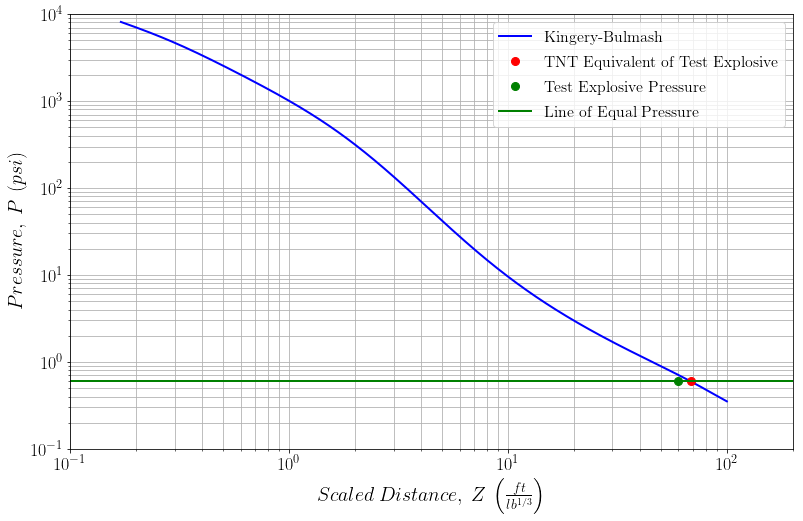

In [18]:
import numpy as np
from matplotlib import pyplot as plt

# Kinger Bulmash Lines
z1 = np.arange(0.17, 100, 0.01)

y1 = kingery_bulmash_ip(z1)



fig, ax = plt.subplots()

ax.loglog(z1,y1, color='blue', label='Kingery-Bulmash')

ax.loglog(z_test_tnt,p_test_tnt, 'ro', label='TNT Equivalent of Test Explosive')
ax.loglog(z_test,p_test, 'go', label='Test Explosive Pressure')
ax.axhline(y=k_test, color="green", label='Line of Equal Pressure')
ax.grid(True, which="both", ls="-")
ax.legend()
ax.set_xlim(0.1,200)
ax.set_ylim(0.1,10000)
ax.set_xlabel(r'$Scaled\:Distance,\:Z\:\left(\frac{ft}{lb^{1/3}}\right)$')
ax.set_ylabel(r'$Pressure,\:P\:\left(psi\right)$');

In [16]:
EI = z_test/z_test_tnt
print('The pressure TNT equivalency is {:2.4f}'.format(EI))

The pressure TNT equivalency is 0.8770
